In [4]:
import os
import numpy as np
from matchms.importing import load_from_json
path = 'C://Users//noeli//OneDrive//Escritorio//CEU//3.2 CUATRIMESTRE//Proyectos II//PYCHARM' 
file_json = os.path.join(path, "GNPS-NIH- NATURALPRODUCTSLIBRARY_processed.json")
spectrums = list(load_from_json(file_json))
import gensim

In [2]:
#import gensim
#import spec2vec
#def importSpec2VecModel(file_path):
#    model = gensim.models.Word2Vec.load(file_path)
#    return model

#model=importSpec2VecModel("C:/Users/noeli/OneDrive/Escritorio/CEU")
#model.wv.index_to_key[0]

In [14]:
import gensim
import os
path_model = os.path.join(os.path.dirname(os.getcwd()),"CEU")
filename = os.path.join(path_model, "spec2vec_AllPositive_ratio05_filtered_201101_iter_15.model")
model = gensim.models.Word2Vec.load(filename)
model.wv.index_to_key[0]

'peak@105.07'

In [5]:
import matchms.filtering as ms_filters

def metadata_processing(spectrum):
    spectrum = ms_filters.default_filters(spectrum)
    spectrum = ms_filters.add_precursor_mz(spectrum)
    return spectrum

def peak_processing(spectrum):
    spectrum = ms_filters.default_filters(spectrum)
    spectrum = ms_filters.normalize_intensities(spectrum)
    spectrum = ms_filters.select_by_intensity(spectrum, intensity_from=0.01)
    spectrum = ms_filters.select_by_mz(spectrum, mz_from=10, mz_to=1000)
    return spectrum

In [6]:
spectrums = [metadata_processing(s) for s in spectrums]
spectrums = [peak_processing(s) for s in spectrums]

In [17]:
from spec2vec import Spec2Vec
spec2vec_similarity = Spec2Vec(model=model, intensity_weighting_power=0.5, allowed_missing_percentage=5.0)


In [21]:
from matchms import calculate_scores
scores = calculate_scores(spectrums, spectrums, spec2vec_similarity, is_symmetric=True)
print(scores.score_names)

('Spec2Vec',)


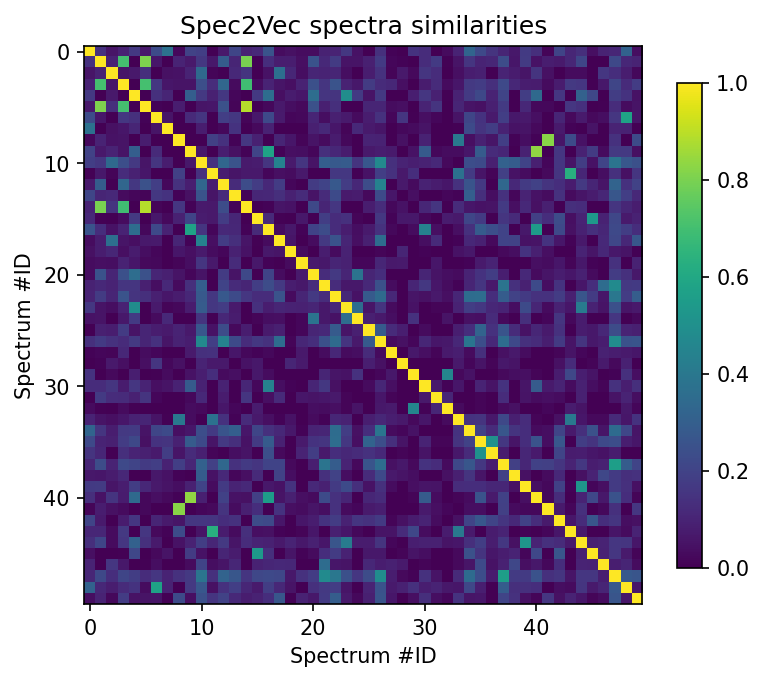

In [22]:
from matplotlib import pyplot as plt
scores_array = scores.scores.to_array()  # for matchms >= 0.18.0
plt.figure(figsize=(6,6), dpi=150)
plt.imshow(scores_array[:50, :50], cmap="viridis")
plt.colorbar(shrink=0.7)
plt.title("Spec2Vec spectra similarities")
plt.xlabel("Spectrum #ID")
plt.ylabel("Spectrum #ID")
plt.clim(0, 1)  # Spec2Vec scores can be between -1 and 1
#plt.savefig("spec2vec_scores.png")

In [8]:
from spec2vec import SpectrumDocument
from spec2vec.model_building import train_new_word2vec_model
spectrum_documents = [SpectrumDocument(s, n_decimals=2) for s in spectrums]
model_file = "NOELIA_Model.model"
model = train_new_word2vec_model(spectrum_documents, iterations=[25], 
                                 filename=model_file, workers=2, progress_logger=True)

  Epoch 1 of 25.Change in loss after epoch 1: 273992.53125
  Epoch 2 of 25.Change in loss after epoch 2: 210577.125
  Epoch 3 of 25.Change in loss after epoch 3: 195797.53125
  Epoch 4 of 25.Change in loss after epoch 4: 186015.9375
  Epoch 5 of 25.Change in loss after epoch 5: 177290.1875
  Epoch 6 of 25.Change in loss after epoch 6: 167640.3125
  Epoch 7 of 25.Change in loss after epoch 7: 160637.0
  Epoch 8 of 25.Change in loss after epoch 8: 155509.375
  Epoch 9 of 25.Change in loss after epoch 9: 151792.625
  Epoch 10 of 25.Change in loss after epoch 10: 148093.5
  Epoch 11 of 25.Change in loss after epoch 11: 144737.5
  Epoch 12 of 25.Change in loss after epoch 12: 141972.875
  Epoch 13 of 25.Change in loss after epoch 13: 140861.75
  Epoch 14 of 25.Change in loss after epoch 14: 132260.0
  Epoch 15 of 25.Change in loss after epoch 15: 129846.0
  Epoch 16 of 25.Change in loss after epoch 16: 126791.0
  Epoch 17 of 25.Change in loss after epoch 17: 124550.75
  Epoch 18 of 25.Chang